In [4]:
import pandas as pd

In [5]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
diabetes.columns

Index([u'Number_pregnant', u'Glucose_concentration', u'Blood_pressure',
       u'Triceps', u'Insulin', u'BMI', u'Pedigree', u'Age', u'Class',
       u'Group'],
      dtype='object')

In [8]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree']

In [10]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min() ))

In [11]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [12]:
import tensorflow as tf

In [13]:
diabetes.columns

Index([u'Number_pregnant', u'Glucose_concentration', u'Blood_pressure',
       u'Triceps', u'Insulin', u'BMI', u'Pedigree', u'Age', u'Class',
       u'Group'],
      dtype='object')

In [16]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [18]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [19]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

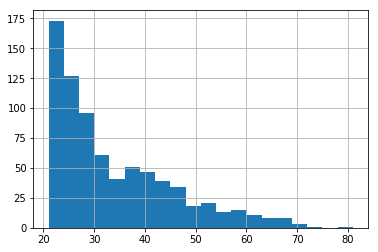

In [21]:
diabetes['Age'].hist(bins=20)

In [22]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [23]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [24]:
# TRAIN TEST SPLIT

In [25]:
x_data = diabetes.drop('Class', axis = 1)

In [27]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [28]:
labels = diabetes['Class']

In [29]:
# labels

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [32]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [33]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2ec07610>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmpATxNsU', '_train_distribute': None, '_save_summary_steps': 100}


In [34]:
model.train(input_fn=input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmpATxNsU/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 118.733
INFO:tensorflow:loss = 4.607999, step = 101 (0.848 sec)
INFO:tensorflow:global_step/sec: 308.895
INFO:tensorflow:loss = 4.68953, step = 201 (0.319 sec)
INFO:tensorflow:global_step/sec: 357.342
INFO:tensorflow:loss = 3.4026399, step = 301 (0.281 sec)
INFO:tensorflow:global_step/sec: 312.71
INFO:tensorflow:loss = 5.270877, step = 401 (0.319 sec)
INFO:tensorflow:global_step/sec: 259.388
INFO:tensorflow:loss = 3.9998815, step = 501 (0.385 sec)
INFO:tensorflow:global_step/sec: 319.676
INFO:tensorflow:loss = 5.964902, step = 601 (0.313 sec)
INFO:tensorflow:global

In [35]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [36]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-05-01:55:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmpATxNsU/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-05-01:55:14
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74891776, accuracy_baseline = 0.64935064, auc = 0.8000823, auc_precision_recall = 0.64430785, average_loss = 0.52540517, global_step = 1000, label/mean = 0.35064936, loss = 5.057025, precision = 0.6666667, prediction/mean = 0.36634773, recall = 0.56790125
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmpATxNsU/model.ckpt-1000


In [37]:
results

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8000823,
 'auc_precision_recall': 0.64430785,
 'average_loss': 0.52540517,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.057025,
 'precision': 0.6666667,
 'prediction/mean': 0.36634773,
 'recall': 0.56790125}

In [38]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10, num_epochs=1, shuffle=False)

In [39]:
predictions = model.predict(pred_input_func)

In [41]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmpATxNsU/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [42]:
my_pred

[{'class_ids': array([1]),
  'classes': array(['1'], dtype=object),
  'logistic': array([0.53413427], dtype=float32),
  'logits': array([0.13674998], dtype=float32),
  'probabilities': array([0.46586564, 0.53413427], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array(['1'], dtype=object),
  'logistic': array([0.6319297], dtype=float32),
  'logits': array([0.54050434], dtype=float32),
  'probabilities': array([0.36807024, 0.6319297 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([0.38697425], dtype=float32),
  'logits': array([-0.4600488], dtype=float32),
  'probabilities': array([0.6130258 , 0.38697425], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([0.3323507], dtype=float32),
  'logits': array([-0.6975723], dtype=float32),
  'probabilities': array([0.66764927, 0.3323507 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object)

In [45]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [47]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [49]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [50]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x110c7ca50>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_device_fn': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmpLpiJ9p', '_train_distribute': None, '_save_summary_steps': 100}


In [51]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmpLpiJ9p/model.ckpt.
INFO:tensorflow:loss = 6.906241, step = 1
INFO:tensorflow:global_step/sec: 130.981
INFO:tensorflow:loss = 6.2359176, step = 101 (0.763 sec)
INFO:tensorflow:global_step/sec: 253.097
INFO:tensorflow:loss = 6.766177, step = 201 (0.396 sec)
INFO:tensorflow:global_step/sec: 294.648
INFO:tensorflow:loss = 7.870137, step = 301 (0.339 sec)
INFO:tensorflow:global_step/sec: 220.842
INFO:tensorflow:loss = 5.728303, step = 401 (0.453 sec)
INFO:tensorflow:global_step/sec: 325.679
INFO:tensorflow:loss = 1.8535582, step = 501 (0.306 sec)
INFO:tensorflow:global_step/sec: 264.531
INFO:tensorflow:loss = 4.097527, step = 601 (0.378 sec)
INFO:tensorflow:glob

In [52]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [53]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-05-02:05:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmpLpiJ9p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-05-02:06:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.8195884, auc_precision_recall = 0.6855135, average_loss = 0.50055677, global_step = 1000, label/mean = 0.35064936, loss = 4.817859, precision = 0.6666667, prediction/mean = 0.3790846, recall = 0.69135803
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/ln/f77dg_9179l5d0265rd3jn0c0000gn/T/tmpLpiJ9p/model.ckpt-1000


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8195884,
 'auc_precision_recall': 0.6855135,
 'average_loss': 0.50055677,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.817859,
 'precision': 0.6666667,
 'prediction/mean': 0.3790846,
 'recall': 0.69135803}